In [47]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset, ConcatDataset,make_grid
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
import CustomClassifier
from PIL import Image
import cv2
import os

In [49]:
# 모델 아키텍처 정의
model = CustomClassifier()
model_dict = torch.load('pre-train model PATH')  #모델이 저장된 파일의 경로
model.load_state_dict(model_dict)
model.eval()

CustomClassifier(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.15, inplace=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (relu5): ReLU()
  (fc3): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

tensor([[4.6491e-18]])


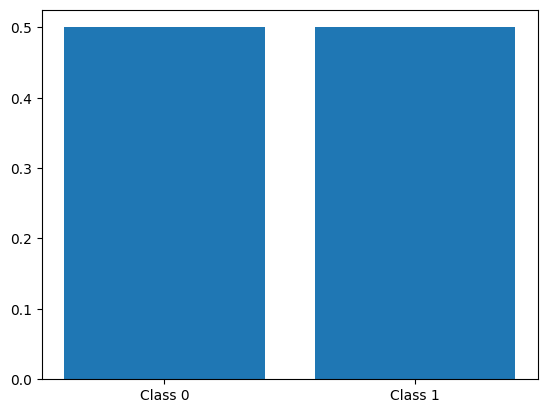

In [50]:


# 이미지를 PIL 이미지로 열어서 모델에 넣기 전에 변환하는 함수
def preprocess_image(image_path):
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),  # 이미지를 Tensor로 변환
        
    ])
    return transform(image).unsqueeze(0)  # 모델의 입력 차원에 맞게 차원을 늘려줍니다.

# 이미지 경로 설정
image_path = 'TEST IMG PATH'  # 이미지 경로

# 이미지 전처리
input_image = preprocess_image(image_path)

# 모델 추론
with torch.no_grad():
    output = model(input_image)

print(output)

# 만약 출력된 값이 확률을 나타낸다면, 다음과 같이 시각화할 수 있어요.
probability = torch.sigmoid(output).item()

# 예측된 확률을 시각화합니다.
plt.bar(['Class 0', 'Class 1'], [1 - probability, probability])
plt.show()

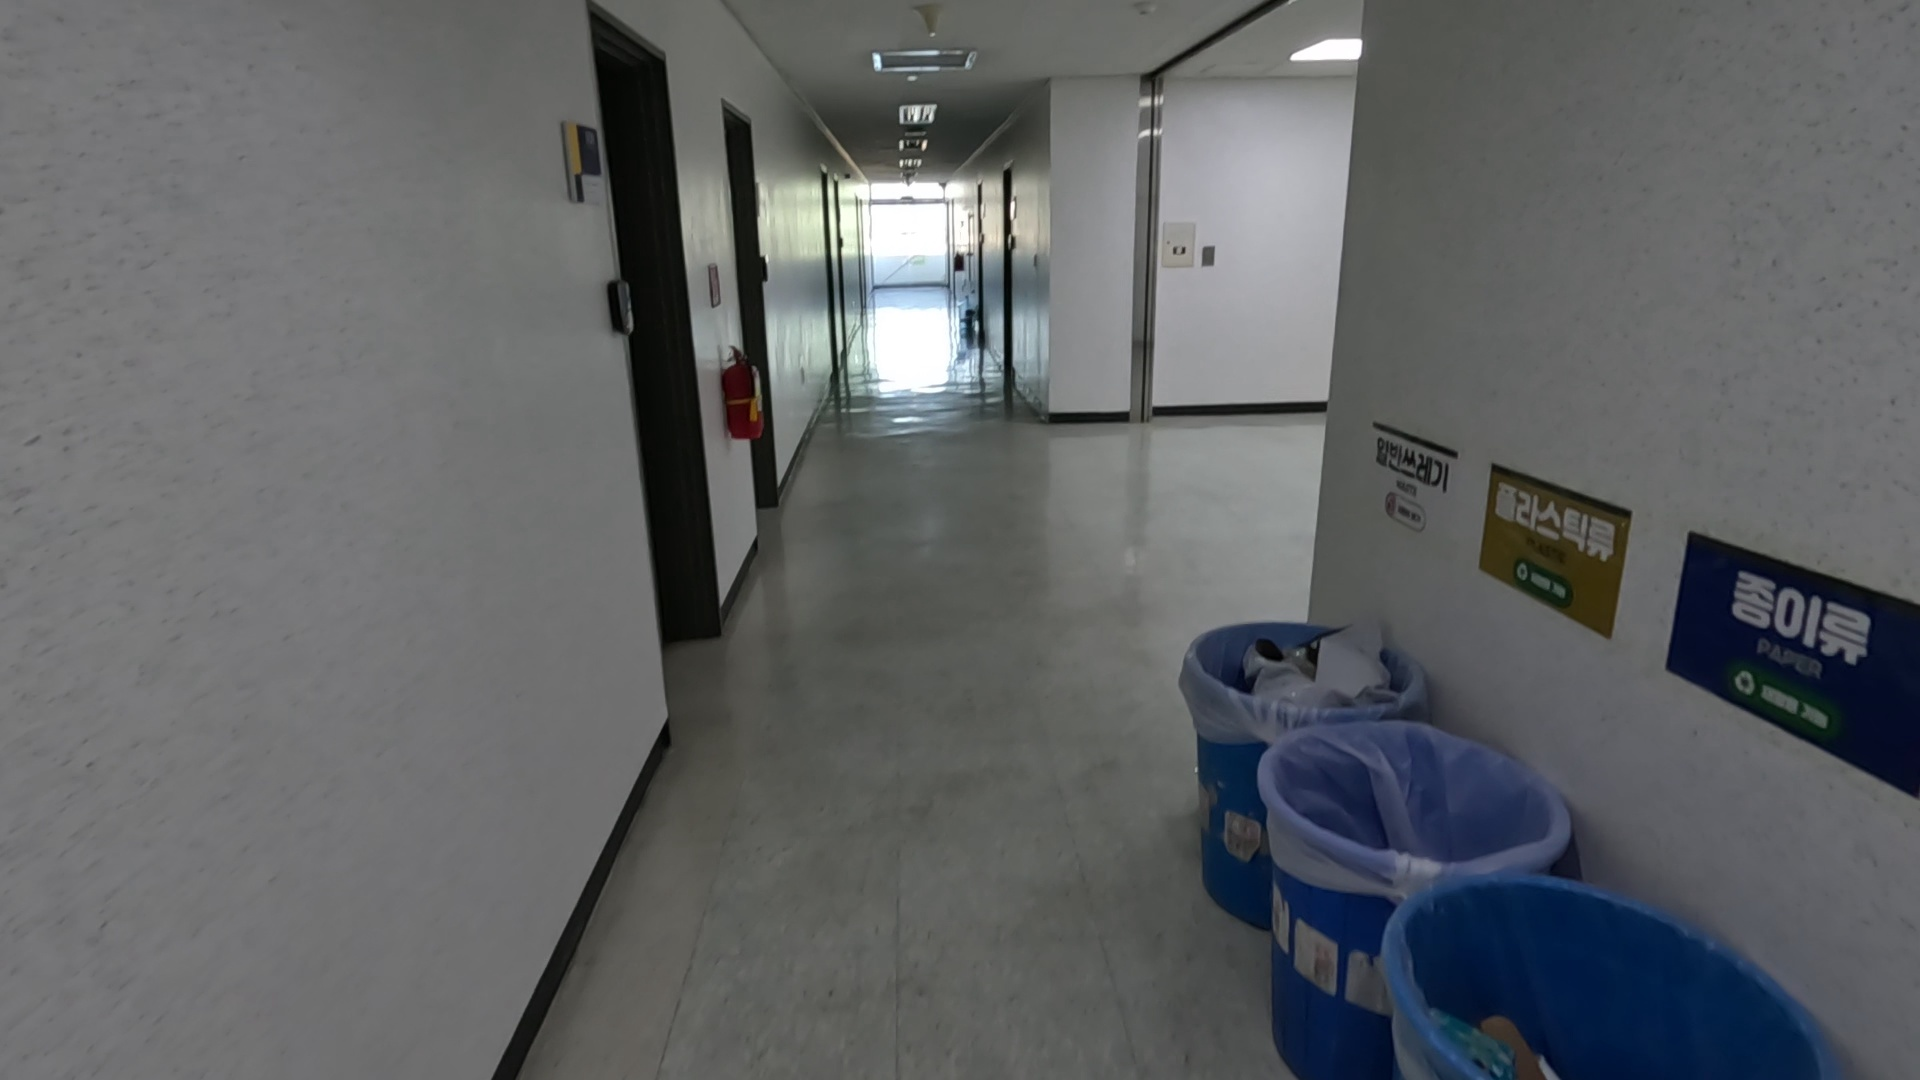

In [46]:
display(Image.open(image_path))